#  Predicting Employee Productivity Using Tree Models

The garment industry is one of the key examples of the industrial globalization of the modern era.

It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.

So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories.

This dataset can be used for regression purposes by predicting the productivity range (0-1) or for classification purposes by transforming the productivity range (0-1) into different classes.

The following is the dataset's official column information:

- date: date in MM-DD-YYYY
- quarter: a portion of the month — month was divided into four quarters
- department: associated department with the instance
- day: day of the week
- team: associated team number with the instance
- targeted_productivity: targeted productivity set by the authority for each team for each day
- smv: standard minute value — the allocated time for a task
- wip: work in progress — includes the number of unfinished items for products
- over_time: represents the amount of overtime by each team in minutes
- incentive: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action
- idle_time: the duration of time when the production was interrupted due to several reasons
- idle_men: the number of workers who were idle due to production interruption
- no_of_style_change: number of changes in the style of a particular product
- no_of_workers: number of workers on each team
- actual_productivity: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

In [134]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [135]:
gwd = pd.read_csv('garments_worker_productivity.csv')

gwd.head() # Display the first few roles of the dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [136]:
gwd.shape # Number of Observation & Features

(1197, 15)

In [137]:
gwd.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [138]:
gwd.isna().sum() # Checking for missing values

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

There's only one feature that as missing values i.e wip column

In [139]:
gwd.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [140]:
gwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [141]:
gwd.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [142]:
gwd['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

The department column as some contradicting values 'finishing ' & 'finishing'. We are to replace the column with the right values

In [143]:
gwd.loc[gwd['department'] == 'finishing ', 'department'] = 'finishing'
gwd['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

In [144]:
gwd['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

There are only 4 quarters in the normal calender year and the number of observations for the quarter5 is small compared to others. We push all Quarter5 to Quarter4

In [145]:
gwd.loc[gwd['quarter'] == 'Quarter5', 'quarter'] = 'Quarter4'
gwd['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

Drop all uncessary columns we do not need in the datasets. Which are 'date', 'wip', "idle_time", "idle_men", "no_of_style_change" columns

In [146]:
gwd = gwd.drop(['date', 'wip', "idle_time", "idle_men", "no_of_style_change"], axis=1)

Since we are preparing the dataset for a machine learning classification project, we need convert all object columns to int64 and to encode the values to numerical data

In [147]:
gwd['quarter'] = gwd['quarter'].replace({'Quarter1': 1, 'Quarter2': 2, 
                                         'Quarter3': 3, 'Quarter4': 4})
gwd['quarter'].value_counts()

1    360
2    335
4    292
3    210
Name: quarter, dtype: int64

In [148]:
gwd['quarter'].dtypes

dtype('int64')

In [149]:
# create and convert the target column to classification data True/False
gwd['productivity'] = gwd['actual_productivity'] >= gwd['targeted_productivity']

In [150]:
gwd['department'] = gwd['department'].replace({'sweing': 1, 'finishing': 0})
gwd['department'].value_counts()

1    691
0    506
Name: department, dtype: int64

In [151]:
day_dummy = pd.get_dummies(gwd['day'], prefix=None)
gwd = pd.concat([gwd, day_dummy], axis=1)

In [152]:
quarter_dummy = pd.get_dummies(gwd['quarter'], prefix='q')
gwd = pd.concat([gwd, quarter_dummy], axis=1)

In [153]:
team_dummy = pd.get_dummies(gwd['team'], prefix='team')
gwd = pd.concat([gwd, team_dummy], axis=1)

In [154]:
gwd = gwd.drop(["day", "quarter", 'team'], axis=1)

In [155]:
gwd['no_of_workers'] = gwd['no_of_workers'].astype('int64')

In [156]:
gwd.head()

,department,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productivity,Monday,Saturday,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,0.80,26.16,7080,98,59,0.940725,True,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0.75,3.94,960,0,8,0.886500,True,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.80,11.41,3660,50,30,0.800570,True,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0.80,11.41,3660,50,30,0.800570,True,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0.80,25.90,1920,50,56,0.800382,True,0,0,...,0,0,0,1,0,0,0,0,0,0


Now our dataset is clean and ready for training and testing on machine learning

## Building the Tree

In [157]:
# Break the dataset into features and Target

X = gwd.drop(["actual_productivity", 'productivity'], axis=1)
y = gwd['productivity']

# Dividing in training and test sets with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state = 32)

For the X variable, we removed the column "actual_productivity", because it would've been the target column for a Regression Tree. As for "productive", it's the target column we will use here, so we took it out from "X" and it became "y".

The dataset splitting step is critical when working with scikit-learn: we divide the dataset into a Training Subset to fit it to our algorithm, and a Test Subset to predict its target labels and later calculate how predictive it is.

In [158]:
# Instantiating and fitting the Decision Tree Classifier

model_class = DecisionTreeClassifier(max_depth = 3, 
                                    random_state = 32)

model_class.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=32)

To ensure that the visualization of our Tree is legible and to avoid overfitting, we set a "max_depth" of 3 so that the Tree only has 3 levels.

Now we will make the predictions on the test set. They will be stored in a variable that we will then use to determine the algorithm's accuracy.

In [159]:
y_pred = model_class.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred), 2))

Accuracy: 0.78


## Visualizing and Evaluating the Tree

We will use plot_tree to generate this visualization.

Note that we used the "filled" parameter to assign a color to each predicted class in order to make it easier to see them.

In [160]:
model_class.classes_ # We'll transform them to ["Unproductive", "Productive"]

array([False,  True])

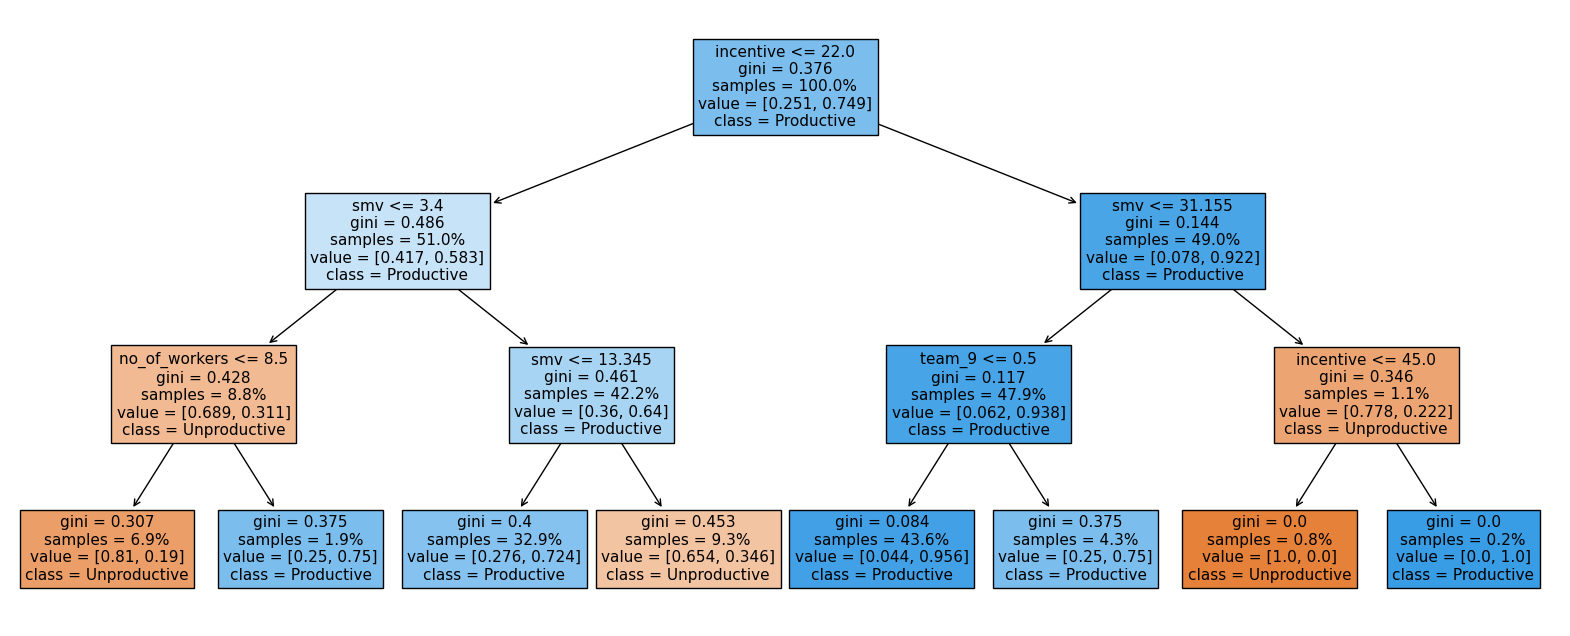

In [161]:
# Setting plot size

plt.figure(figsize = [20.0, 8.0])

# Plotting the tree with some specific parameters

_ = plot_tree(model_class, 
          feature_names = X.columns, 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11) 

plt.show()


We can see here that the most significant columns turned out to be "incentive" and "smv" (Standard Minute Value, or the allocated time for a task). All the splits, except one, used these columns to progressively divide the dataset into more homogeneous subsets.

It's important to remember that we pruned the tree when we instantiated the model. We restricted it to only feature a maximum depth of three levels to avoiding overfitting. If we hadn't, it's likely we would've seen other columns further dividing the dataset.

Let's use the model on a hypothetical observation which has an "incentive" of 24 and a "smv" of 5, as you can use the tree visually by following the branches to reach the leaf containing the prediction.

Since the "incentive" is greater than 22, 24 <= 22 evaluates to False at the root node and so we follow the path to the right (False splits always go to the right.) Since the "smv" is less than 31.155, 5 <= 31.155 evaluates to True at the child node below the root and so we follow the path to the left (True splits always go to the left.) In the final split before the leaf, since the "smv" is greater than 3.92, 5 <= 3.92 evaluates to False and so we follow the path to the right where we reach the final leaf node, which happens to feature a "Productive" class.

To summarize, all this means that an observation with those characteristics would be predicted as "Productive" by the Decision Tree.

Having plotted the Tree, we can continue exploring how effective the Tree is when using alternate metrics. Let's first start with a Confusion Matrix, to keep it as reference:

In [162]:
confusion_matrix(y_test, y_pred)

array([[ 44,  68],
       [ 11, 237]])

And now we can proceed to calculate the Precision, Recall, F1 Score and Accuracy.

In [164]:
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))
print("F1 Score:", round(f1_score(y_test, y_pred), 2))
print("Accuracy:", round(model_class.score(X_test, y_test), 2))

Precision: 0.78
Recall: 0.96
F1 Score: 0.86
Accuracy: 0.78


All these alternate metrics are even superior to Accuracy! Special mention for Recall, with a superb value of 0.96!

We also have another option to evaluate our tree: Cross Validation. It divides the dataset into blocks/folds (the number of folds is determined by the "cv" parameter). Then it creates that many copies of the dataset where each copy will have a different segment of observations compared to the test set.

The algorithm will then iterate on each copy and will output a list of the accuracy scores for all iterations.

This is a practical way to ensure that we didn't get the original accuracy score by pure chance by comparing it with several other possible results.

To improve readability in the calculations below, we have rounded the values to two decimals.

In [166]:
scores = cross_val_score(model_class, X, y, cv = 10)

print("Cross Validation Accuracy Scores:", scores.round(2)) 
print("Mean Cross Validation Score:", scores.mean().round(2))

Cross Validation Accuracy Scores: [0.82 0.86 0.82 0.84 0.85 0.8  0.72 0.74 0.82 0.77]
Mean Cross Validation Score: 0.8


To finish with this section, let's now get Cross Validated values for the other evaluation metrics:

In [167]:
multiple_cross_scores = cross_validate(
                             model_class, 
                             X, y, cv = 10, 
                             scoring= ("precision", "recall", "f1") )

multiple_cross_scores["test_precision"].round(2)
print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))
multiple_cross_scores["test_recall"].round(2)
print("Mean Cross Validated Recall:", round(multiple_cross_scores["test_recall"].mean(), 2))
multiple_cross_scores["test_f1"].round(2)
print("Mean Cross Validated Recall:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated Precision: 0.83
Mean Cross Validated Recall: 0.92
Mean Cross Validated Recall: 0.87


After double checking with Cross Validate, we're still getting impressive metrics. This is excellent!

## Explaining the Tree

In [169]:
model_class.classes_ # We'll transform them to ["Unproductive", "Productive"]

array([False,  True])

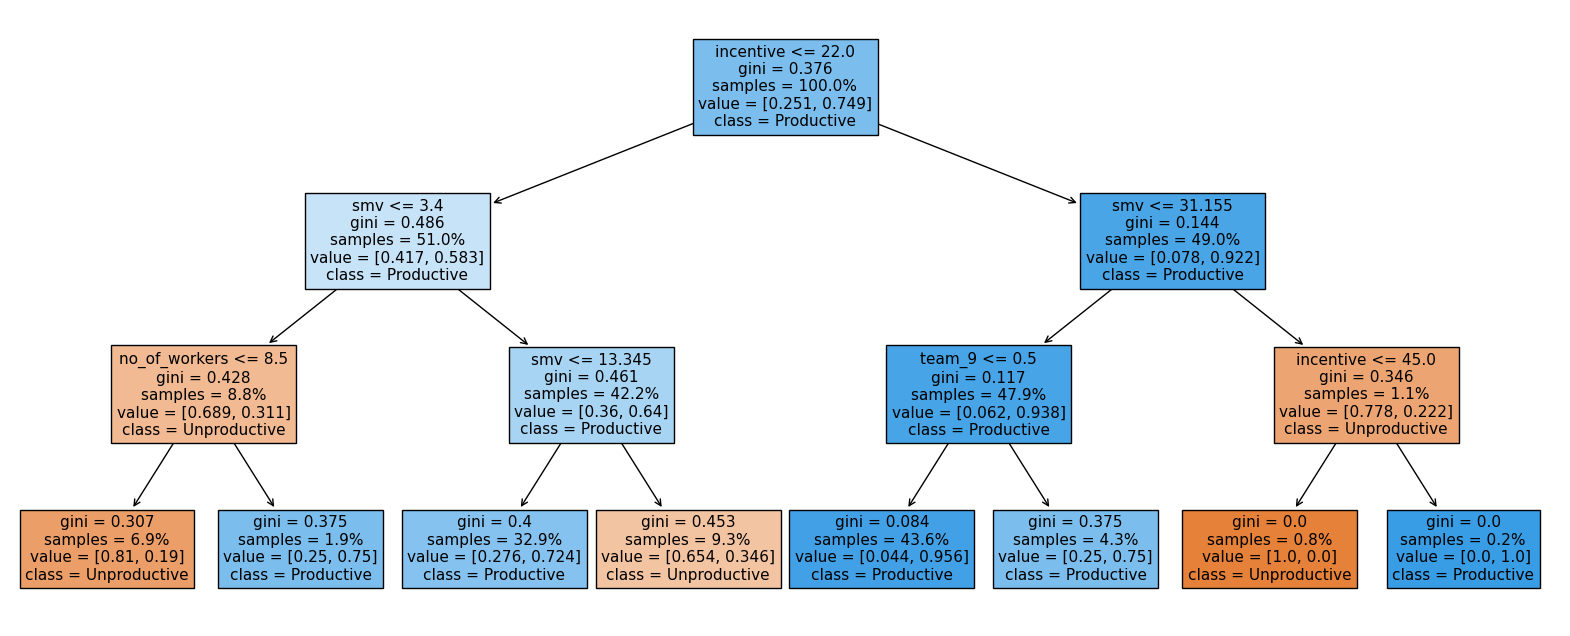

In [171]:
plt.figure(figsize = [20.0, 8.0])

_ = plot_tree(model_class, 
              feature_names = X.columns, 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11) 

"The graphic illustrates which aspects of the factory are best at predicting if a team will be productive or not. When we say aspects, we mean variables like the date, department, team number, etc. In our case, we discovered that the "incentive" and the "smv" variables were the ones with the greatest influence on the final prediction. To provide context, the "incentive" variable represents the amount of financial incentive offered to motivate a particular course of action. The "smv" (Standard Minute Value) variable represents the time allocated for a specific task.

How do we know that these two variables are the most predictive? We know this because of the information included in the square boxes in the graphic! For example, if we focus on the top part of each box, we will see that those two variables are the ones that appear most frequently. In fact, there is only a single exception in the lower left of the graphic where the variable "number of workers" appears at the top.

To summarize, the Decision Tree not only told us which variables have the strongest predictive power ("incentive" and "smv"), but it also allows us to make predictions using values of our own choosing. This is the power of Decision Trees! Any questions?"

## Using Random Forest

To confirm and validate the results from our Decision Tree model, let's use a Random Forest to compare results.

In [173]:
forest = RandomForestClassifier(
                                oob_score = True,                                  
                                random_state = 24
                               )

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_forest), 2))

Accuracy: 0.8


In [174]:
print("Out Of Bag Score:", round(forest.oob_score_, 2))

Out Of Bag Score: 0.82
